In [2]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate synthetic data

In [3]:
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Split the data into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

# Manual gradient descent for linear regression

In [7]:
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            # Compute predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Reshape X_train for the manual gradient descent implementation

In [9]:
X_train_reshaped = X_train.reshape(-1, 1)

# Initialize and train the gradient descent linear regression model

In [10]:
gd_lr = GradientDescentLinearRegression(learning_rate=0.01, n_iterations=1000)
gd_lr.fit(X_train_reshaped, y_train)

# Make predictions on the test set

In [11]:
X_test_reshaped = X_test.reshape(-1, 1)
y_pred = gd_lr.predict(X_test_reshaped)

# Evaluate the model

In [12]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 417.00933221477027


# Plot the results

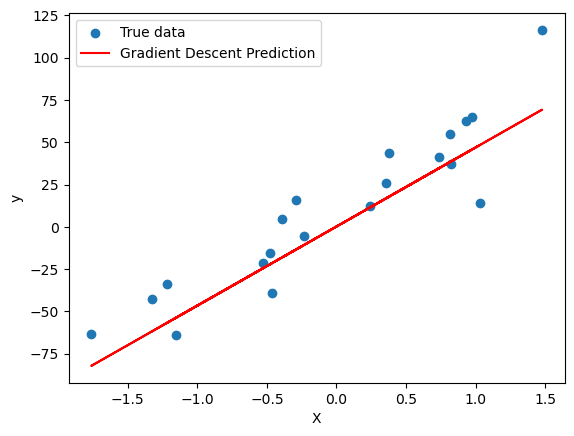

In [13]:
plt.scatter(X_test, y_test, label='True data')
plt.plot(X_test, y_pred, color='red', label='Gradient Descent Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Mean Squared Error: 416.80890612748107


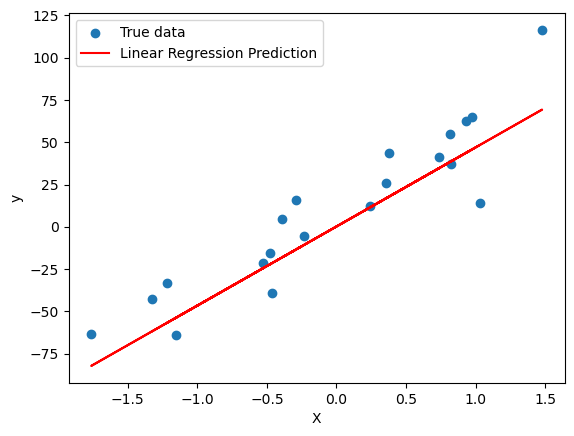

In [14]:
# Initialize and train the scikit-learn Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.scatter(X_test, y_test, label='True data')
plt.plot(X_test, y_pred, color='red', label='Linear Regression Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()